In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFile

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

C:\Users\kaust\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# importing os module to check no. of images present inside the folder
import os

train_tree_dir = "D:/Kaustubh/Master In Data Science/Sukhumal das/computer vision/Yoga_dataset/TRAIN/tree"
train_downdog_dir = "D:/Kaustubh/Master In Data Science/Sukhumal das/computer vision/Yoga_dataset/TRAIN/downdog"


test_tree_dir = "D:/Kaustubh/Master In Data Science/Sukhumal das/computer vision/Yoga_dataset/TEST/tree"
test_downdog_dir = "D:/Kaustubh/Master In Data Science/Sukhumal das/computer vision/Yoga_dataset/TEST/downdog"

In [3]:
print('total train tree images:', len(os.listdir(train_tree_dir)))
print('total train downdog images:', len(os.listdir(train_downdog_dir)))

print('total test tree images:', len(os.listdir(test_tree_dir)))
print('total test downdog images:', len(os.listdir(test_downdog_dir)))

total train tree images: 160
total train downdog images: 223
total test tree images: 69
total test downdog images: 97


In [4]:
# ImageDataGenerator is used for augmentation (scaling,rotate,flip,shift and so on) of all images inside a folder

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "D:/Kaustubh/Master In Data Science/Sukhumal das/computer vision/Yoga_dataset/TRAIN"
test_dir = "D:/Kaustubh/Master In Data Science/Sukhumal das/computer vision/Yoga_dataset/TEST"

In [5]:
# Preventing errors with truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Function to remove corrupted images
def removeCorruptedImages(path):
    for filename in os.listdir(path):
        try:
            img = Image.open(os.path.join(path,filename))
            img.verify()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            os.remove(os.path.join(path,filename))

In [6]:
# Removing corrupted images
classes = ['downdog','tree']
for cls in classes:
    removeCorruptedImages(os.path.join(train_dir, cls))
    removeCorruptedImages(os.path.join(test_dir, cls))

In [7]:
# In model1 we use only scaling in generator now we will Use more augmentation
train_datagen_augment = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_augment = train_datagen_augment.flow_from_directory(train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=4,
                                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=4,
                                                  class_mode='categorical')

Found 383 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


In [8]:
# let's define a function for prediction new image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model=load_model("model_vgg16.h5")
def pred(img_path):
  img = image.load_img(img_path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  img_data=preprocess_input(x)
  model.predict(img_data)
  classes = list(train_generator_augment.class_indices.keys())
  print(f"Prediction is : {classes[np.argmax(model.predict(img_data))]}")
  plt.imshow(img)
  plt.show()


1/1 [==============================] - 0s 274ms/step
Prediction is : tree


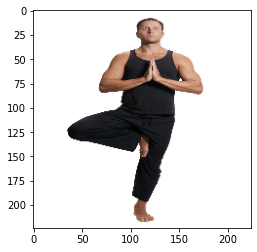

In [9]:
pred("00000004.jpg")

In [10]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2

In [27]:
filename = "webcam_output.avi"
# Define video codec (FourCC). You can find more options here: https://simple.wikipedia.org/wiki/FourCC
fourcc = cv2.VideoWriter_fourcc(*'XVID')

cap = cv2.VideoCapture(0)

# Create video writer object
output = cv2.VideoWriter(filename, fourcc, 1.0, (224, 224))

while True:
    flag, frame = cap.read()
    frame = cv2.resize(frame, (224, 224))
    x = image.img_to_array(frame)
    x = np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    yoga_pose = model.predict(img_data)
    
    classes = list(train_generator_augment.class_indices.keys())
    print(f"Prediction is : {classes[np.argmax(model.predict(img_data))]}")
    
    cv2.putText(frame,f"Prediction is : {classes[np.argmax(model.predict(img_data))]}",(50,50),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),3)
        
    cv2.imshow("Yoga pose",frame)
    output.write(frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
output.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 295ms/step
Prediction is : downdog
1/1 [==============================] - 0s 284ms/step
Prediction is : tree
1/1 [==============================] - 0s 270ms/step
Prediction is : downdog
1/1 [==============================] - 0s 282ms/step
Prediction is : downdog
1/1 [==============================] - 0s 277ms/step
Prediction is : downdog
1/1 [==============================] - 0s 270ms/step
Prediction is : downdog
1/1 [==============================] - 0s 281ms/step
Prediction is : downdog
1/1 [==============================] - 0s 276ms/step
Prediction is : downdog
1/1 [==============================] - 0s 264ms/step
Prediction is : downdog
1/1 [==============================] - 0s 278ms/step
Prediction is : downdog
1/1 [==============================] - 0s 275ms/step
Prediction is : downdog
1/1 [==============================] - 0s 271ms/step
Prediction is : tree
1/1 [==============================] - 0s 266ms/step
Prediction is : tree
1/1 [===